<a href="https://colab.research.google.com/github/Ayush9719/Fellowship-Ai/blob/main/Sentiment%20Analysis%20on%20Amazon%20Reviews%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from tqdm import tqdm_notebook
import torch
import fastai
from fastai.text import *
fastai.__version__

'1.0.61'

In [4]:
path = untar_data(URLs.AMAZON_REVIEWS, dest = "Data")

In [5]:
path.ls()

[PosixPath('Data/amazon_review_full_csv/train.csv'),
 PosixPath('Data/amazon_review_full_csv/readme.txt'),
 PosixPath('Data/amazon_review_full_csv/test.csv')]

In [6]:
train_df = pd.read_csv(path/'train.csv', header=None, names=['Rating', 'Title', 'Review'], skiprows=(2000000))
train_df.head()

,Rating,Title,Review
0,3,Interesting form.,Interesting kung fu style-- Combination of Whi...
1,4,Excellent advice on cutting fat & increasing f...,This is a well organized book with lots of use...
2,5,"Wise, practical, and medically sound",Life is about making choices and owning up to ...
3,1,Starve your kids now so they can be fat later.,Another book that teaches kids that being bigg...
4,3,If John Sayles adapted a Joseph Wambaugh story...,Evenhand is a very impressive accomplishment: ...


In [7]:
valid_df = pd.read_csv(path/'test.csv', header=None, names=['Rating', 'Title', 'Review'], skiprows=(435000))
valid_df.head()

,Rating,Title,Review
0,3,product quality good but ivory color not,I ordered the ivory color of these plates as I...
1,5,made in america,I currently own six of these sets in different...
2,2,Fiesta Dishes,I have several place settings of Fiesta Dishes...
3,2,Place setting,I read the title wrong. I thought I was gettin...
4,5,Excellent reference,This book is for any mother in the process of ...


In [8]:
data_lm = TextLMDataBunch.from_df(path=path, train_df=train_df[:10000], valid_df=valid_df[:10000], text_cols=2, label_cols=0)

/usr/local/lib/python3.7/dist-packages/fastai/core.py:302: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(a, dtype=dtype, **kwargs)


In [9]:
data_lm.save('lm_databunch-amazon')

In [10]:
learn = language_model_learner(data_lm, drop_mult=0.3, arch=AWD_LSTM)

In [12]:
learn.lr_find(start_lr = slice(10e-7, 10e-5), end_lr=slice(0.1, 10))

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 1.58E-02
Min loss divided by 10: 5.62E-03


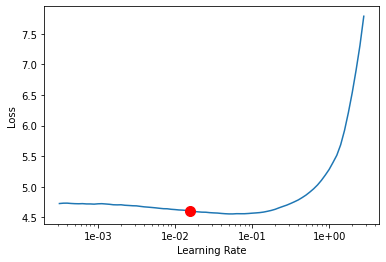

In [13]:
learn.recorder.plot(skip_end=10, suggestion=True)

In [14]:
best_lm_lr = 1.58E-02

In [15]:
%%time
learn.fit_one_cycle(1, best_lm_lr)

epoch,train_loss,valid_loss,accuracy,time
0,4.199122,3.978187,0.276044,48:43


CPU times: user 48min 35s, sys: 20 s, total: 48min 55s
Wall time: 48min 43s


In [16]:
learn.unfreeze()

In [ ]:
%%time
learn.fit_one_cycle(5, best_lm_lr)

epoch,train_loss,valid_loss,accuracy,time
0,4.048203,4.125217,0.262214,1:03:04
1,4.147581,4.148723,0.262282,1:02:52
2,3.926590,4.086612,0.270196,1:02:31


epoch,train_loss,valid_loss,accuracy,time
0,4.048203,4.125217,0.262214,1:03:04
1,4.147581,4.148723,0.262282,1:02:52
2,3.926590,4.086612,0.270196,1:02:31
3,3.506627,4.041773,0.277061,1:02:14
